<a href="https://colab.research.google.com/github/OmerAGilin/Road2-AI-Course/blob/main/Road2_AI_Course_lesson_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

good evening. please prepare to write code in python and keras, but don't write anything yet, and be aware that i am using google colab

are you familiar with the yolov8 label format of datasets? if so, please show me what values are in the label

**class x_center y_center width height**

very good, that's exactly the format we are going to work with

please write code that accesses the first 5 images in this folder: /content/drive/MyDrive/Colab Notebooks/lesson 3.2/database/images, and does to each one the following things:

1. extract the bounding box from the label file in this folder: /content/drive/MyDrive/Colab Notebooks/lesson 3.2/database/annotations (note that the label is recognised by having the same name as the image but the different suffix .txt, and that it is in yolov8 format)

2. create a new image by cropping the bounding box

3. convert the new image to gray scale.

4. resize the image to be 28 by 28 pixels

then print the 5 new images

In [1]:
import os
import cv2
import numpy as np

# Define the paths to the images and labels
image_folder = "/content/drive/MyDrive/Colab Notebooks/lesson 3.2/database/images"
label_folder = "/content/drive/MyDrive/Colab Notebooks/lesson 3.2/database/annotations"

# Get a list of the first 5 images in the folder
image_files = os.listdir(image_folder)[:5]

# Iterate through each image
for image_file in image_files:
    # 1. Extract bounding box from the label file
    label_file = os.path.join(label_folder, image_file.replace(".jpg", ".txt"))
    with open(label_file, "r") as f:
        lines = f.readlines()

    # Extracting values from YOLOv8 format
    class_index, x_center, y_center, width, height = map(float, lines[0].split())

    # Calculate bounding box coordinates
    img = cv2.imread(os.path.join(image_folder, image_file))
    h, w, _ = img.shape
    x_min = int((x_center - width / 2) * w)
    y_min = int((y_center - height / 2) * h)
    x_max = int((x_center + width / 2) * w)
    y_max = int((y_center + height / 2) * h)

    # 2. Create a new image by cropping the bounding box
    cropped_img = img[y_min:y_max, x_min:x_max]

    # 3. Convert the new image to grayscale
    gray_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

    # 4. Resize the image to 28 by 28 pixels
    resized_img = cv2.resize(gray_img, (28, 28))

    # Display or save the new images
    cv2.imshow("Original Image", img)
    cv2.imshow("Cropped Image", cropped_img)
    cv2.imshow("Grayscale Image", gray_img)
    cv2.imshow("Resized Image", resized_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


DisabledFunctionError: ignored

it seems cv2.imshow is disables in colab, can you please write the code differently to overcome this?

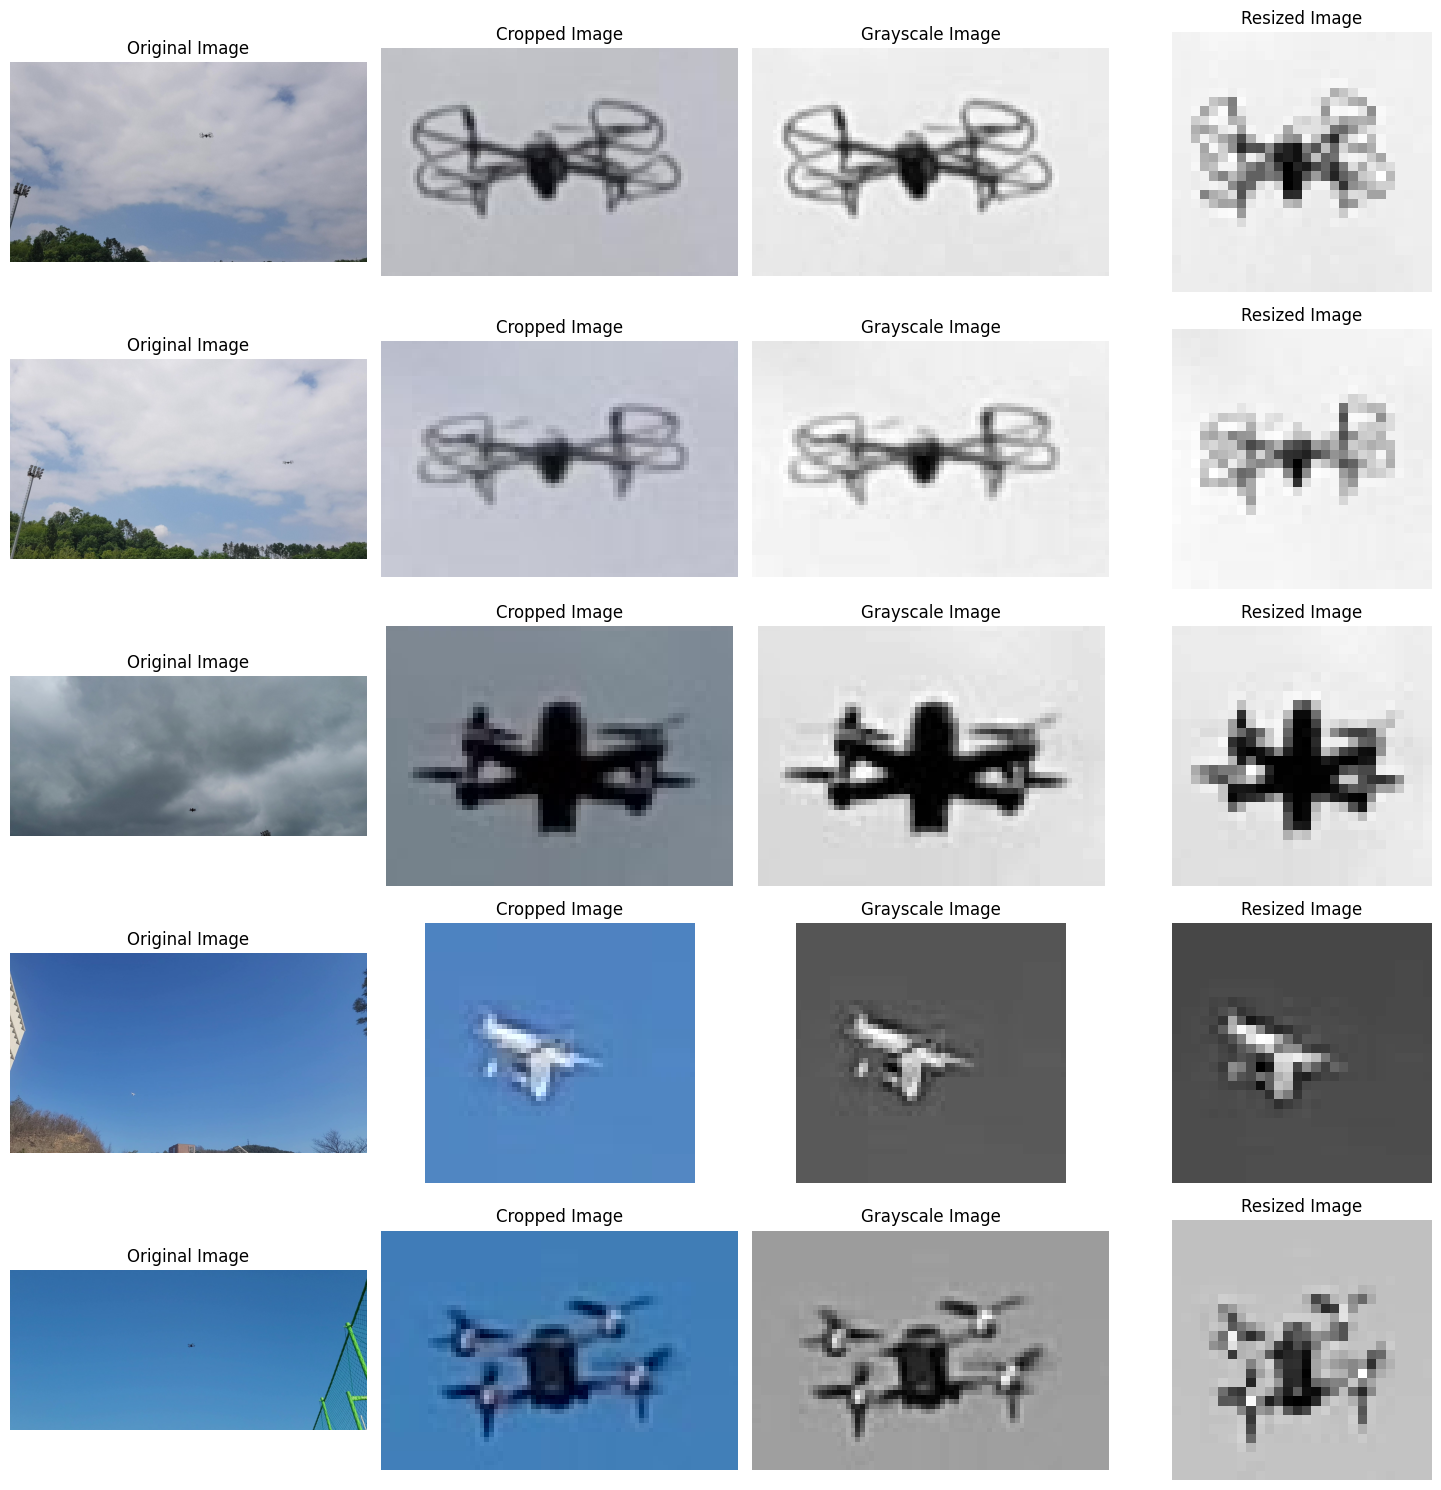

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the paths to the images and labels
image_folder = "/content/drive/MyDrive/Colab Notebooks/lesson 3.2/database/images"
label_folder = "/content/drive/MyDrive/Colab Notebooks/lesson 3.2/database/annotations"

# Get a list of the first 5 images in the folder
image_files = os.listdir(image_folder)[:5]

# Create a subplot for each image
fig, axs = plt.subplots(5, 4, figsize=(15, 15))

# Iterate through each image
for i, image_file in enumerate(image_files):
    # 1. Extract bounding box from the label file
    label_file = os.path.join(label_folder, image_file.replace(".jpg", ".txt"))
    with open(label_file, "r") as f:
        lines = f.readlines()

    # Extracting values from YOLOv8 format
    class_index, x_center, y_center, width, height = map(float, lines[0].split())

    # Calculate bounding box coordinates
    img = cv2.imread(os.path.join(image_folder, image_file))
    h, w, _ = img.shape
    x_min = int((x_center - width / 2) * w)
    y_min = int((y_center - height / 2) * h)
    x_max = int((x_center + width / 2) * w)
    y_max = int((y_center + height / 2) * h)

    # 2. Create a new image by cropping the bounding box
    cropped_img = img[y_min:y_max, x_min:x_max]

    # 3. Convert the new image to grayscale
    gray_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

    # 4. Resize the image to 28 by 28 pixels
    resized_img = cv2.resize(gray_img, (28, 28))

    # Display the images
    axs[i, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i, 0].set_title("Original Image")

    axs[i, 1].imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
    axs[i, 1].set_title("Cropped Image")

    axs[i, 2].imshow(gray_img, cmap='gray')
    axs[i, 2].set_title("Grayscale Image")

    axs[i, 3].imshow(resized_img, cmap='gray')
    axs[i, 3].set_title("Resized Image")

# Hide the axes labels
for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()


that worked perfectly. now please do the same thing for all the images in the folder: /content/drive/MyDrive/Colab Notebooks/lesson 3.2/database/images, whose labels are in this folder: /content/drive/MyDrive/Colab Notebooks/lesson 3.2/database/annotations, and after resizing each new image save it in this folder: /content/drive/MyDrive/Colab Notebooks/lesson 3.2/dataset/images_1. afterwards, for each new image created, create a label file in .txt format file simply containing the label "1", named like the image but with the suffix .txt, and save it in this folder: /content/drive/MyDrive/Colab Notebooks/lesson 3.2/dataset/labels_1. after you finish saving each image, print the amount of images you finished proccessing.

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the paths to the images, labels, and the output folders
image_folder = "/content/drive/MyDrive/Colab Notebooks/lesson 3.2/database/images"
label_folder = "/content/drive/MyDrive/Colab Notebooks/lesson 3.2/database/annotations"
output_image_folder = "/content/drive/MyDrive/Colab Notebooks/lesson 3.2/dataset/images_1"
output_label_folder = "/content/drive/MyDrive/Colab Notebooks/lesson 3.2/dataset/labels_1"

# Create output folders if they don't exist
os.makedirs(output_image_folder, exist_ok=True)
os.makedirs(output_label_folder, exist_ok=True)

# Get a list of all images in the folder
image_files = os.listdir(image_folder)

# Counter for the number of processed images
processed_images = 0

# Iterate through each image
for image_file in image_files:
    # 1. Extract bounding box from the label file
    label_file = os.path.join(label_folder, image_file.replace(".jpg", ".txt"))

    # Check if the label file exists
    if not os.path.exists(label_file):
        continue

    with open(label_file, "r") as f:
        lines = f.readlines()

    # Extracting values from YOLOv8 format
    class_index, x_center, y_center, width, height = map(float, lines[0].split())

    # Calculate bounding box coordinates
    img = cv2.imread(os.path.join(image_folder, image_file))
    h, w, _ = img.shape
    x_min = int((x_center - width / 2) * w)
    y_min = int((y_center - height / 2) * h)
    x_max = int((x_center + width / 2) * w)
    y_max = int((y_center + height / 2) * h)

    # 2. Create a new image by cropping the bounding box
    cropped_img = img[y_min:y_max, x_min:x_max]

    # 3. Convert the new image to grayscale
    gray_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

    # 4. Resize the image to 28 by 28 pixels
    resized_img = cv2.resize(gray_img, (28, 28))

    # Save the resized image
    output_image_path = os.path.join(output_image_folder, image_file)
    cv2.imwrite(output_image_path, resized_img)

    # Create and save the label file
    output_label_path = os.path.join(output_label_folder, image_file.replace(".jpg", ".txt"))
    with open(output_label_path, "w") as label_f:
        label_f.write("1")

    # Increment the counter
    processed_images += 1

    # Print the progress
    print(f"Processed {processed_images} images.")

print("Processing complete.")


Processed 1 images.
Processed 2 images.
Processed 3 images.
Processed 4 images.
Processed 5 images.
Processed 6 images.
Processed 7 images.
Processed 8 images.
Processed 9 images.
Processed 10 images.
Processed 11 images.
Processed 12 images.
Processed 13 images.
Processed 14 images.
Processed 15 images.
Processed 16 images.
Processed 17 images.
Processed 18 images.
Processed 19 images.
Processed 20 images.
Processed 21 images.
Processed 22 images.
Processed 23 images.
Processed 24 images.
Processed 25 images.
Processed 26 images.
Processed 27 images.
Processed 28 images.
Processed 29 images.
Processed 30 images.
Processed 31 images.
Processed 32 images.
Processed 33 images.
Processed 34 images.
Processed 35 images.
Processed 36 images.
Processed 37 images.
Processed 38 images.
Processed 39 images.
Processed 40 images.
Processed 41 images.
Processed 42 images.
Processed 43 images.
Processed 44 images.
Processed 45 images.
Processed 46 images.
Processed 47 images.
Processed 48 images.
P

please write a seperate code that accesses the first 5 images in this folder: /content/drive/MyDrive/Colab Notebooks/lesson 3.2/database/images, and does the following things to each:

1. create a new image by cropping a 28 by 28 pixels section from a truely random location in the image

2. turn the new image gray scale

then, it prints the 5 new images

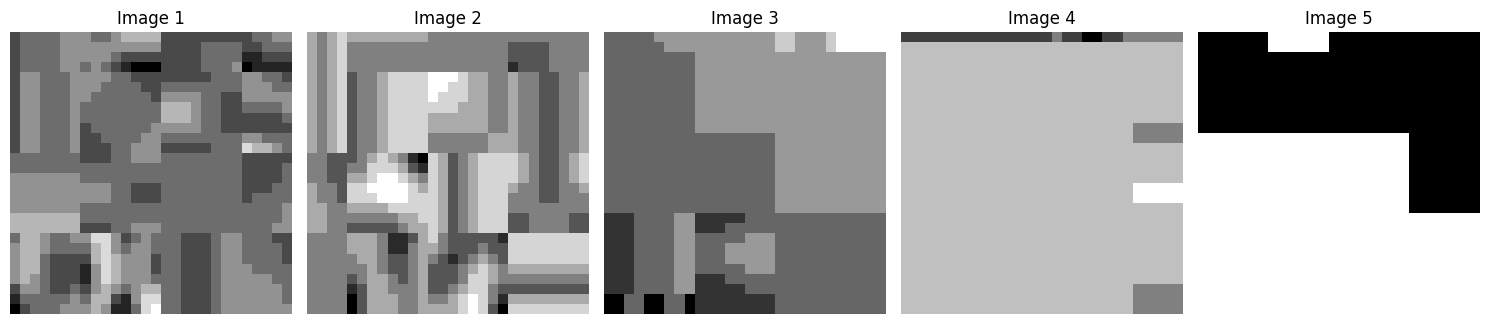

In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the images folder
image_folder = "/content/drive/MyDrive/Colab Notebooks/lesson 3.2/database/images"

# Get a list of the first 5 images in the folder
image_files = os.listdir(image_folder)[:5]

# Create a subplot for each image
fig, axs = plt.subplots(1, 5, figsize=(15, 15))

# Iterate through each image
for i, image_file in enumerate(image_files):
    # Load the original image
    img = cv2.imread(os.path.join(image_folder, image_file))

    # 1. Create a new image by cropping a 28 by 28 pixels section from a truly random location
    h, w, _ = img.shape
    rand_x = np.random.randint(0, w - 28)
    rand_y = np.random.randint(0, h - 28)
    cropped_img = img[rand_y:rand_y+28, rand_x:rand_x+28]

    # 2. Turn the new image grayscale
    gray_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

    # Display the images
    axs[i].imshow(gray_img, cmap='gray')
    axs[i].set_title(f"Image {i + 1}")

# Hide the axes labels
for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()


that worked perfectly. please write a code that does the same thing with all the images in this folder: /content/drive/MyDrive/Colab Notebooks/lesson 3.2/database/images, but saves each new image in this folder: /content/drive/MyDrive/Colab Notebooks/lesson 3.2/dataset/images_0. afterwards, for each new image created, create a label file in .txt format simply containing the label "0", named like the image but with the suffix .txt, and save it in this folder: /content/drive/MyDrive/Colab Notebooks/lesson 3.2/dataset/labels_0. after you finish saving each image, print the amount of images you finished proccessing.

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the paths to the images and the output folders
image_folder = "/content/drive/MyDrive/Colab Notebooks/lesson 3.2/database/images"
output_image_folder = "/content/drive/MyDrive/Colab Notebooks/lesson 3.2/dataset/images_0"
output_label_folder = "/content/drive/MyDrive/Colab Notebooks/lesson 3.2/dataset/labels_0"

# Create output folders if they don't exist
os.makedirs(output_image_folder, exist_ok=True)
os.makedirs(output_label_folder, exist_ok=True)

# Get a list of all images in the folder
image_files = os.listdir(image_folder)

# Counter for the number of processed images
processed_images = 0

# Iterate through each image
for image_file in image_files:
    # Load the original image
    img = cv2.imread(os.path.join(image_folder, image_file))

    # 1. Create a new image by cropping a 28 by 28 pixels section from a truly random location
    h, w, _ = img.shape
    rand_x = np.random.randint(0, w - 28)
    rand_y = np.random.randint(0, h - 28)
    cropped_img = img[rand_y:rand_y+28, rand_x:rand_x+28]

    # 2. Turn the new image grayscale
    gray_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

    # Save the new image
    output_image_path = os.path.join(output_image_folder, image_file)
    cv2.imwrite(output_image_path, gray_img)

    # Create and save the label file
    output_label_path = os.path.join(output_label_folder, image_file.replace(".jpg", ".txt"))
    with open(output_label_path, "w") as label_f:
        label_f.write("0")

    # Increment the counter
    processed_images += 1

    # Print the progress
    print(f"Processed {processed_images} images.")

print("Processing complete.")


Processed 1 images.
Processed 2 images.
Processed 3 images.
Processed 4 images.
Processed 5 images.
Processed 6 images.
Processed 7 images.
Processed 8 images.
Processed 9 images.
Processed 10 images.
Processed 11 images.
Processed 12 images.
Processed 13 images.
Processed 14 images.
Processed 15 images.
Processed 16 images.
Processed 17 images.
Processed 18 images.
Processed 19 images.
Processed 20 images.
Processed 21 images.
Processed 22 images.
Processed 23 images.
Processed 24 images.
Processed 25 images.
Processed 26 images.
Processed 27 images.
Processed 28 images.
Processed 29 images.
Processed 30 images.
Processed 31 images.
Processed 32 images.
Processed 33 images.
Processed 34 images.
Processed 35 images.
Processed 36 images.
Processed 37 images.
Processed 38 images.
Processed 39 images.
Processed 40 images.
Processed 41 images.
Processed 42 images.
Processed 43 images.
Processed 44 images.
Processed 45 images.
Processed 46 images.
Processed 47 images.
Processed 48 images.
P

please write a code that creates a tenzorflow dataset from the images in this folder:/content/drive/MyDrive/Colab Notebooks/lesson 3.2/dataset/images_1, with their respective labels in this folder: /content/drive/MyDrive/Colab Notebooks/lesson 3.2/dataset/labels_1 (90% for training, 10% for testing), and the images in this folder: /content/drive/MyDrive/Colab Notebooks/lesson 3.2/dataset/images_0, with their respective labels in this folder: /content/drive/MyDrive/Colab Notebooks/lesson 3.2/dataset/labels_0 (90% for training, 10% for testing). save the new tenzorflow dataset in this folder: /content/drive/MyDrive/Colab Notebooks/lesson 3.2/TenzorFlow dataset, and print an analytical breakdown of the dataset

In [9]:
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Define the paths to the datasets
images_1_folder = "/content/drive/MyDrive/Colab Notebooks/lesson 3.2/dataset/images_1"
labels_1_folder = "/content/drive/MyDrive/Colab Notebooks/lesson 3.2/dataset/labels_1"
images_0_folder = "/content/drive/MyDrive/Colab Notebooks/lesson 3.2/dataset/images_0"
labels_0_folder = "/content/drive/MyDrive/Colab Notebooks/lesson 3.2/dataset/labels_0"
tf_dataset_folder = "/content/drive/MyDrive/Colab Notebooks/lesson 3.2/TensorFlow_dataset"

# Function to load images and labels
def load_images_and_labels(images_folder, labels_folder):
    image_files = sorted(os.listdir(images_folder))
    label_files = sorted(os.listdir(labels_folder))

    images = [tf.keras.preprocessing.image.load_img(os.path.join(images_folder, img), color_mode='grayscale') for img in image_files]
    images = [tf.keras.preprocessing.image.img_to_array(img) for img in images]

    labels = [int(open(os.path.join(labels_folder, label_file)).read().strip()) for label_file in label_files]

    return images, labels

# Load images and labels for class 1
images_1, labels_1 = load_images_and_labels(images_1_folder, labels_1_folder)

# Load images and labels for class 0
images_0, labels_0 = load_images_and_labels(images_0_folder, labels_0_folder)

# Split the data into training and testing sets (90% training, 10% testing)
images_1_train, images_1_test, labels_1_train, labels_1_test = train_test_split(images_1, labels_1, test_size=0.1, random_state=42)
images_0_train, images_0_test, labels_0_train, labels_0_test = train_test_split(images_0, labels_0, test_size=0.1, random_state=42)

# Concatenate the datasets
train_images = images_1_train + images_0_train
train_labels = labels_1_train + labels_0_train
test_images = images_1_test + images_0_test
test_labels = labels_1_test + labels_0_test

# Shuffle the datasets
train_dataset = list(zip(train_images, train_labels))
test_dataset = list(zip(test_images, test_labels))
np.random.shuffle(train_dataset)
np.random.shuffle(test_dataset)

# Separate the datasets back into images and labels
train_images, train_labels = zip(*train_dataset)
test_images, test_labels = zip(*test_dataset)

# Create TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

# Save the datasets in TensorFlow format
os.makedirs(tf_dataset_folder, exist_ok=True)
tf.data.experimental.save(train_dataset, os.path.join(tf_dataset_folder, "train_dataset"))
tf.data.experimental.save(test_dataset, os.path.join(tf_dataset_folder, "test_dataset"))

# Analytical breakdown
total_samples = len(images_1) + len(images_0)
train_samples = len(train_images)
test_samples = len(test_images)

print("Analytical breakdown of the dataset:")
print(f"Total samples: {total_samples}")
print(f"Training samples: {train_samples} ({train_samples/total_samples*100:.2f}%)")
print(f"Testing samples: {test_samples} ({test_samples/total_samples*100:.2f}%)")


ValueError: ignored

i recieve this error for line 51 of the code: "Unbatching a tensor is only supported for rank >= 1". can you please write the code in a different way to overcome this error?

In [10]:
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Define the paths to the datasets
images_1_folder = "/content/drive/MyDrive/Colab Notebooks/lesson 3.2/dataset/images_1"
labels_1_folder = "/content/drive/MyDrive/Colab Notebooks/lesson 3.2/dataset/labels_1"
images_0_folder = "/content/drive/MyDrive/Colab Notebooks/lesson 3.2/dataset/images_0"
labels_0_folder = "/content/drive/MyDrive/Colab Notebooks/lesson 3.2/dataset/labels_0"
tf_dataset_folder = "/content/drive/MyDrive/Colab Notebooks/lesson 3.2/TensorFlow_dataset"

# Function to load images and labels
def load_images_and_labels(images_folder, labels_folder):
    image_files = sorted(os.listdir(images_folder))
    label_files = sorted(os.listdir(labels_folder))

    images = [tf.keras.preprocessing.image.load_img(os.path.join(images_folder, img), color_mode='grayscale') for img in image_files]
    images = [tf.keras.preprocessing.image.img_to_array(img) for img in images]

    labels = [int(open(os.path.join(labels_folder, label_file)).read().strip()) for label_file in label_files]

    return images, labels

# Load images and labels for class 1
images_1, labels_1 = load_images_and_labels(images_1_folder, labels_1_folder)

# Load images and labels for class 0
images_0, labels_0 = load_images_and_labels(images_0_folder, labels_0_folder)

# Split the data into training and testing sets (90% training, 10% testing)
images_1_train, images_1_test, labels_1_train, labels_1_test = train_test_split(images_1, labels_1, test_size=0.1, random_state=42)
images_0_train, images_0_test, labels_0_train, labels_0_test = train_test_split(images_0, labels_0, test_size=0.1, random_state=42)

# Concatenate the datasets
train_images = images_1_train + images_0_train
train_labels = labels_1_train + labels_0_train
test_images = images_1_test + images_0_test
test_labels = labels_1_test + labels_0_test

# Shuffle the datasets
train_dataset = list(zip(train_images, train_labels))
test_dataset = list(zip(test_images, test_labels))
np.random.shuffle(train_dataset)
np.random.shuffle(test_dataset)

# Separate the datasets back into images and labels
train_images, train_labels = zip(*train_dataset)
test_images, test_labels = zip(*test_dataset)

# Create TensorFlow datasets using from_generator
def generator(images, labels):
    for image, label in zip(images, labels):
        yield image, label

train_dataset = tf.data.Dataset.from_generator(generator, args=[train_images, train_labels], output_signature=(tf.TensorSpec(shape=(None, None, 1), dtype=tf.float32), tf.TensorSpec(shape=(), dtype=tf.int32)))
test_dataset = tf.data.Dataset.from_generator(generator, args=[test_images, test_labels], output_signature=(tf.TensorSpec(shape=(None, None, 1), dtype=tf.float32), tf.TensorSpec(shape=(), dtype=tf.int32)))

# Save the datasets in TensorFlow format
os.makedirs(tf_dataset_folder, exist_ok=True)
tf.data.experimental.save(train_dataset, os.path.join(tf_dataset_folder, "train_dataset"))
tf.data.experimental.save(test_dataset, os.path.join(tf_dataset_folder, "test_dataset"))

# Analytical breakdown
total_samples = len(images_1) + len(images_0)
train_samples = len(train_images)
test_samples = len(test_images)

print("Analytical breakdown of the dataset:")
print(f"Total samples: {total_samples}")
print(f"Training samples: {train_samples} ({train_samples/total_samples*100:.2f}%)")
print(f"Testing samples: {test_samples} ({test_samples/total_samples*100:.2f}%)")


Instructions for updating:
Use `tf.data.Dataset.save(...)` instead.


Analytical breakdown of the dataset:
Total samples: 8140
Training samples: 7326 (90.00%)
Testing samples: 814 (10.00%)


i don't see anything in that folder. do you know why?

In [11]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# ... (Previous code)

# Convert TensorFlow datasets to NumPy arrays
train_images_np = np.array(train_images)
train_labels_np = np.array(train_labels)
test_images_np = np.array(test_images)
test_labels_np = np.array(test_labels)

# Save NumPy arrays
np.save(os.path.join(tf_dataset_folder, "train_images.npy"), train_images_np)
np.save(os.path.join(tf_dataset_folder, "train_labels.npy"), train_labels_np)
np.save(os.path.join(tf_dataset_folder, "test_images.npy"), test_images_np)
np.save(os.path.join(tf_dataset_folder, "test_labels.npy"), test_labels_np)

# Analytical breakdown
total_samples = len(images_1) + len(images_0)
train_samples = len(train_images)
test_samples = len(test_images)

print("Analytical breakdown of the dataset:")
print(f"Total samples: {total_samples}")
print(f"Training samples: {train_samples} ({train_samples/total_samples*100:.2f}%)")
print(f"Testing samples: {test_samples} ({test_samples/total_samples*100:.2f}%)")


Analytical breakdown of the dataset:
Total samples: 8140
Training samples: 7326 (90.00%)
Testing samples: 814 (10.00%)


please create a neural network using keras. the network's input is an image from this dataset you created, and its output is 0 or 1, indicated by the image's label in the dataset. the network should flatten the image into a vector, then use the relu function, then use softmax and pick the most probable option as the output. please print the network's architecture after creating it

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the NumPy arrays containing the images and labels
train_images_np = np.load(os.path.join(tf_dataset_folder, "train_images.npy"))
train_labels_np = np.load(os.path.join(tf_dataset_folder, "train_labels.npy"))

test_images_np = np.load(os.path.join(tf_dataset_folder, "test_images.npy"))
test_labels_np = np.load(os.path.join(tf_dataset_folder, "test_labels.npy"))

# Normalize pixel values to be between 0 and 1
train_images_np = train_images_np / 255.0
test_images_np = test_images_np / 255.0

# Build the neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),  # Flatten the image into a vector
    layers.Dense(128, activation='relu'),     # Dense layer with ReLU activation
    layers.Dense(2, activation='softmax')      # Dense layer with softmax activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 100738 (393.51 KB)
Trainable params: 100738 (393.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


now, please train the network using the entire training section in the dataset over 50 epoch, in batches of 50, using adam's optimizer, and in the end print its learning curve

Epoch 1/50
132/132 [==============================] - 8s 6ms/step - loss: 0.5380 - accuracy: 0.7726 - val_loss: 0.4355 - val_accuracy: 0.8622
Epoch 2/50
132/132 [==============================] - 1s 4ms/step - loss: 0.4200 - accuracy: 0.8553 - val_loss: 0.4086 - val_accuracy: 0.8499
Epoch 3/50
132/132 [==============================] - 1s 4ms/step - loss: 0.3784 - accuracy: 0.8747 - val_loss: 0.3543 - val_accuracy: 0.8799
Epoch 4/50
132/132 [==============================] - 0s 3ms/step - loss: 0.3468 - accuracy: 0.8803 - val_loss: 0.3338 - val_accuracy: 0.9004
Epoch 5/50
132/132 [==============================] - 0s 3ms/step - loss: 0.3010 - accuracy: 0.8928 - val_loss: 0.2756 - val_accuracy: 0.9072
Epoch 6/50
132/132 [==============================] - 0s 3ms/step - loss: 0.2736 - accuracy: 0.9043 - val_loss: 0.2378 - val_accuracy: 0.9181
Epoch 7/50
132/132 [==============================] - 0s 3ms/step - loss: 0.2507 - accuracy: 0.9149 - val_loss: 0.2163 - val_accuracy: 0.9195
Epoch 

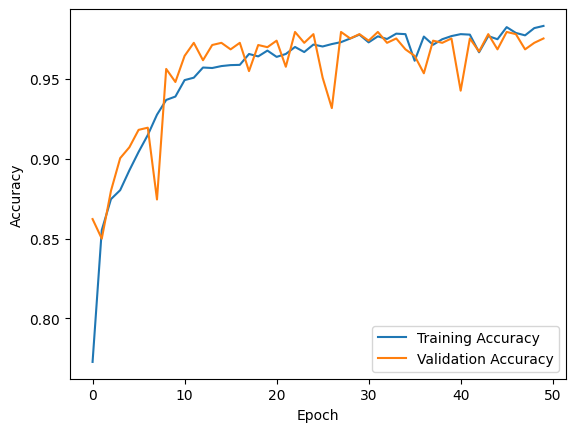

In [13]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(
    train_images_np,
    train_labels_np,
    epochs=50,
    batch_size=50,
    validation_split=0.1  # Using 10% of the training data for validation
)

# Plot the learning curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


please test the network with the entire testing section of the dataset, and in the end print a confusion matrix of its results

Test Accuracy: 97.42%
26/26 [==============================] - 0s 3ms/step


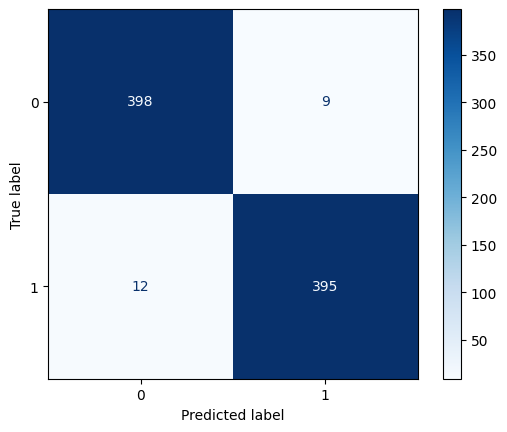

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Test the model
test_loss, test_accuracy = model.evaluate(test_images_np, test_labels_np, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Predict labels for the test set
predicted_labels = np.argmax(model.predict(test_images_np), axis=1)

# Generate confusion matrix
cm = confusion_matrix(test_labels_np, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.show()
